In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', 100)


In [2]:
ml_listings = pd.read_csv('../data/ml_listings.csv', encoding='ISO-8859-1')

C:\Users\NoelleKiesz\AppData\Local\Temp\ipykernel_438524\2226537143.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  ml_listings = pd.read_csv('../data/ml_listings.csv', encoding='ISO-8859-1')


In [3]:
ml_listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       '# w/in 2mi', 'Avg yelp rating', '% Restaurants'],
      dtype='object')

In [4]:
ml_listings['name'].value_counts().sum()

101626

Getting rid of listings that have a nightly price of $0

In [5]:
ml_listings = ml_listings[ml_listings['price']!=0]

In [6]:
ml_listings[ml_listings['price']==0].shape[0]

0

In [7]:
ml_listings[['listing_id','district','# w/in 2mi','Avg yelp rating','% Restaurants']]

,listing_id,district,# w/in 2mi,Avg yelp rating,% Restaurants
0,281420,NaN,310.0,4.245161,0.645161
1,3705183,NaN,343.0,4.241983,0.647230
2,4082273,NaN,331.0,4.250755,0.655589
3,4797344,NaN,310.0,4.248387,0.667742
4,4823489,NaN,145.0,4.217241,0.710345
...,...,...,...,...,...
101697,38338635,NaN,116.0,4.250000,0.689655
101698,38538692,NaN,225.0,4.253333,0.684444
101699,38683356,NaN,344.0,4.238372,0.648256
101700,39659000,NaN,361.0,4.213296,0.648199


<AxesSubplot:>

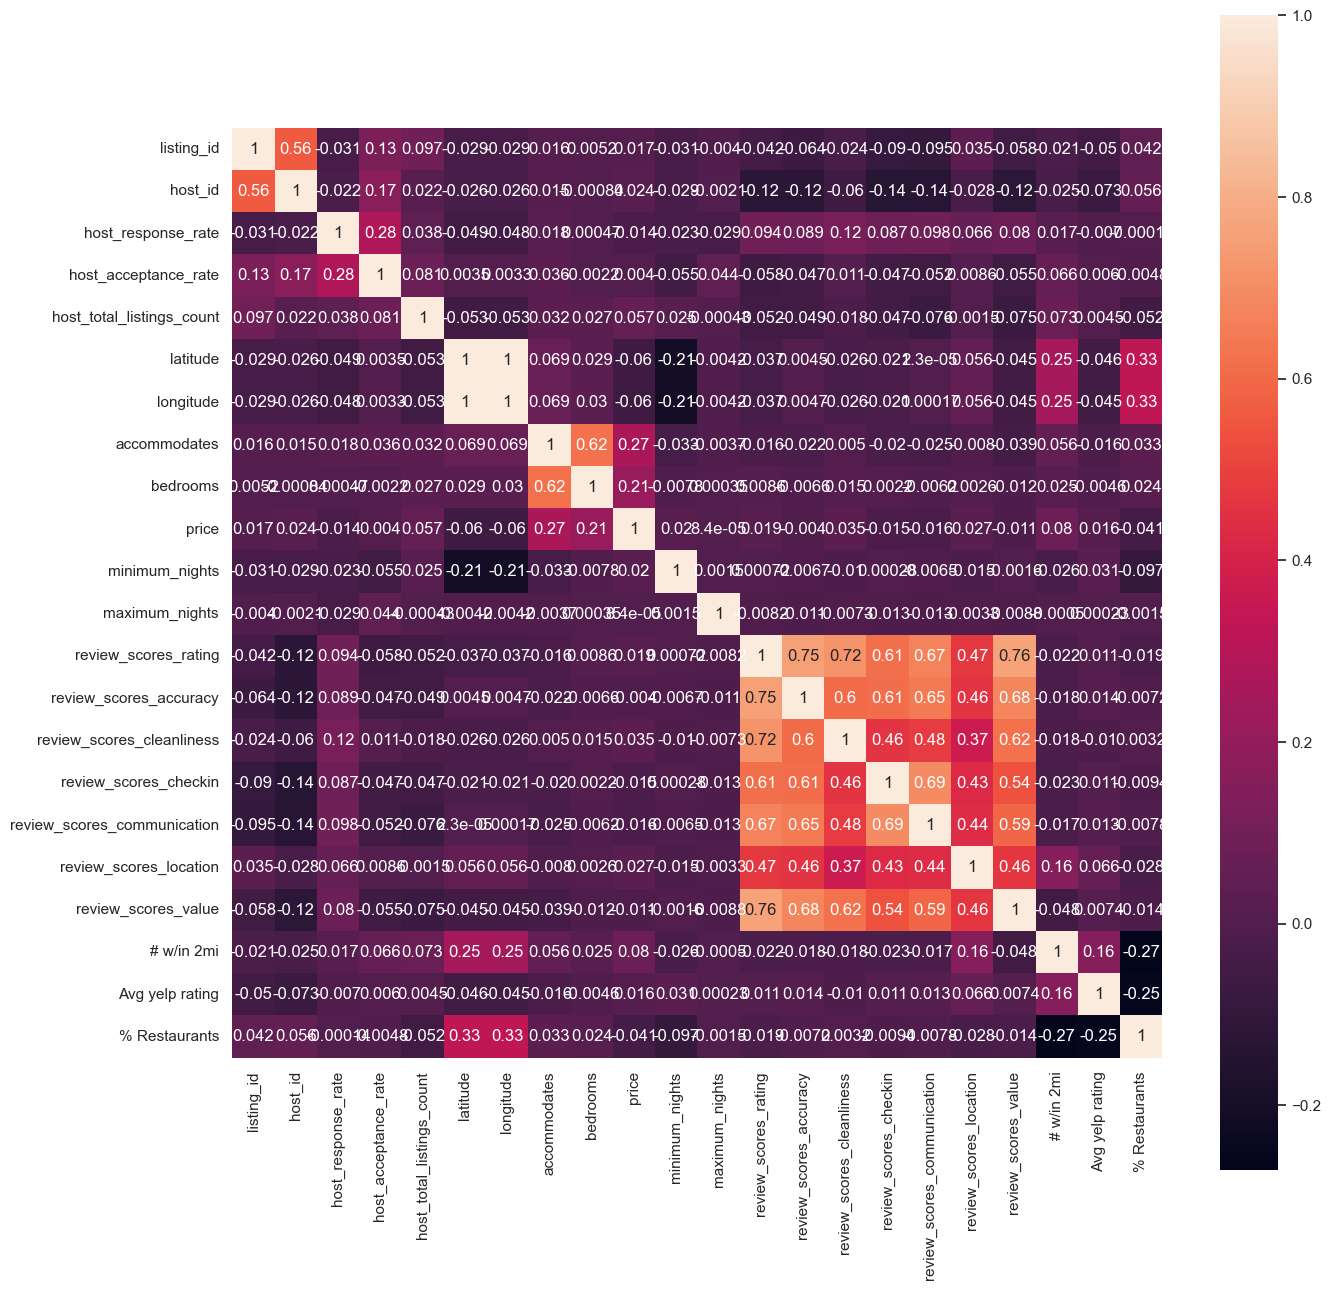

In [49]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(ml_listings.corr(),annot=True, square=True)

In [8]:
filtered_listings = ml_listings[(ml_listings['district'] == 'Bronx')| (ml_listings['district'] == 'Brooklyn')]

In [9]:
filtered_listings.head(1)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,# w/in 2mi,Avg yelp rating,% Restaurants
9222,4259427,Appartement en duplex de 3 chambres,21833312,2014-09-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Crown Heights,Brooklyn,New York,40.67027,-73.94033,Entire apartment,Entire place,6,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""Air ...",220,6,1125,87.0,9.0,8.0,10.0,10.0,8.0,8.0,f,188.0,4.284574,0.585106


In [10]:
filtered_listings['name'].value_counts().sum()

15458

In [11]:
display_columns = ['listing_id', 'district', '# w/in 2mi', 'Avg yelp rating', '% Restaurants']

In [12]:
display_data = filtered_listings[display_columns]

display_data.value_counts().sum()

15463

In [13]:
type(display_data)

pandas.core.frame.DataFrame

In [14]:
X = filtered_listings[[
                        'district',
                       '# w/in 2mi',
                       'Avg yelp rating',
                       '% Restaurants',
                       'latitude',
                       'longitude']]
y = filtered_listings['price']
print(X.shape)
X.head(3)

(15463, 6)


,district,# w/in 2mi,Avg yelp rating,% Restaurants,latitude,longitude
9222,Brooklyn,188.0,4.284574,0.585106,40.67027,-73.94033
9227,Brooklyn,206.0,4.334951,0.665049,40.71109,-73.95918
9228,Brooklyn,152.0,4.358553,0.710526,40.71552,-73.93869


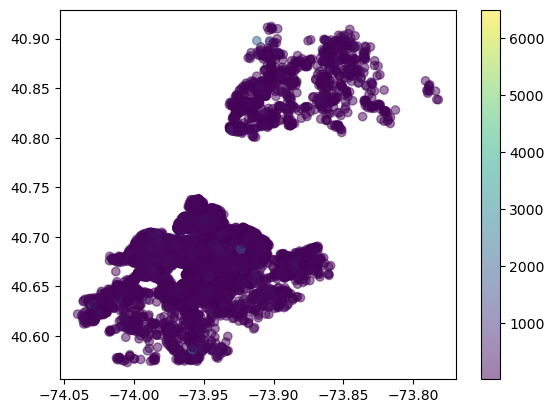

In [15]:
plt.scatter(X['longitude'], X['latitude'], c=y, alpha=0.5);
plt.colorbar();

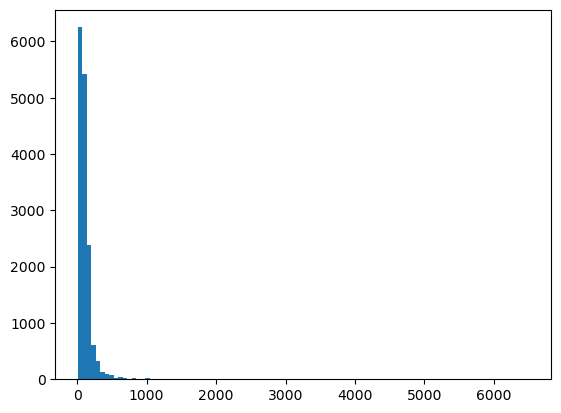

In [16]:
plt.hist(y, bins=100);

In [17]:
X_dummies = pd.get_dummies(X, columns=['district'])

In [18]:
X_dummies.head(1)

,# w/in 2mi,Avg yelp rating,% Restaurants,latitude,longitude,district_Bronx,district_Brooklyn
9222,188.0,4.284574,0.585106,40.67027,-73.94033,0,1


In [19]:
scaler = StandardScaler()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=0, test_size=0.2)

In [21]:
# Only Works if 'district' column is not included in the X
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.022390536758468804

In [22]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
knn = KNeighborsRegressor()

In [24]:
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [25]:
knn.score(X_test,y_test)

-0.20815964013840538

In [26]:
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test,y_pred)

print(f'MSE: {mse}')

MSE: 31975.856644034917


Fitting the scaled data

In [27]:
knn.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [28]:
y_pred = knn.predict(X_test_scaled)

In [29]:
knn.score(X_test_scaled,y_test)

-0.21818449108723015

In [30]:
knn1= KNeighborsRegressor(n_neighbors=150)

In [31]:
knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.0036122473050006487

In [32]:
y_pred1 = knn1.predict(X_test)

mse1 = mean_squared_error(y_test,y_pred)

print(f'MSE: {mse1}')

MSE: 32241.180187520204


only location as a predictor

In [39]:
X_loc = filtered_listings[['latitude',
                          'longitude']]
y_loc = filtered_listings['price']

In [44]:
X_loc_train, y_loc_train, X_loc_test,y_loc_test = train_test_split(X_loc,y_loc, random_state=0, test_size=.2)

In [45]:
X_loc_train.shape, X_loc_test.shape

((12370, 2), (12370,))

In [50]:
knn.fit(X_loc_train,y_loc_train)
# knn.score(X_loc_test,y_loc_test)

ValueError: Found input variables with inconsistent numbers of samples: [12370, 3093]

In [47]:
filtered_listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       '# w/in 2mi', 'Avg yelp rating', '% Restaurants'],
      dtype='object')

In [ ]:
X1 = [['']]

Attempting Gradient Boosting

In [93]:
filtered_listings.head(5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,# w/in 2mi,Avg yelp rating,% Restaurants
9222,4259427,Appartement en duplex de 3 chambres,21833312,2014-09-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Crown Heights,Brooklyn,New York,40.67027,-73.94033,Entire apartment,Entire place,6,3.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""Air ...",220,6,1125,87.0,9.0,8.0,10.0,10.0,8.0,8.0,f,188.0,4.284574,0.585106
9227,8404499,Spacious and sunny 1BR w terrasse,6630320,2013-05-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Williamsburg,Brooklyn,New York,40.71109,-73.95918,Entire apartment,Entire place,4,1.0,"[""Essentials"", ""TV"", ""Wifi"", ""Shampoo"", ""Heati...",150,30,1125,91.0,10.0,9.0,10.0,10.0,9.0,9.0,f,206.0,4.334951,0.665049
9228,10166986,Resort-like living in Williamsburg,14461742,2014-04-19,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Williamsburg,Brooklyn,New York,40.71552,-73.93869,Entire apartment,Entire place,4,2.0,"[""Hot tub"", ""Iron"", ""Essentials"", ""Hangers"", ""...",100,30,1125,100.0,10.0,8.0,10.0,10.0,10.0,10.0,f,152.0,4.358553,0.710526
9234,32543276,Eclectic 1BR apartment in the Heart of Park Slope,16165864,2014-05-30,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,t,t,Park Slope,Brooklyn,New York,40.67373,-73.97639,Entire apartment,Entire place,2,1.0,"[""First aid kit"", ""Hair dryer"", ""Hot tub"", ""Ir...",91,30,1125,94.0,10.0,9.0,10.0,10.0,10.0,10.0,t,307.0,4.314332,0.599349
11604,657198,"2BR gem in Cobble Hill, Brooklyn",414627,2011-02-28,"New York, New York, United States",NaN,NaN,0.0,f,1.0,t,t,Columbia St,Brooklyn,New York,40.68863,-74.00181,Entire apartment,Entire place,4,2.0,"[""Free parking on premises"", ""Essentials"", ""TV...",200,3,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,207.0,4.282609,0.608696


In [94]:
X.shape,y.shape

((15463, 6), (15463,))

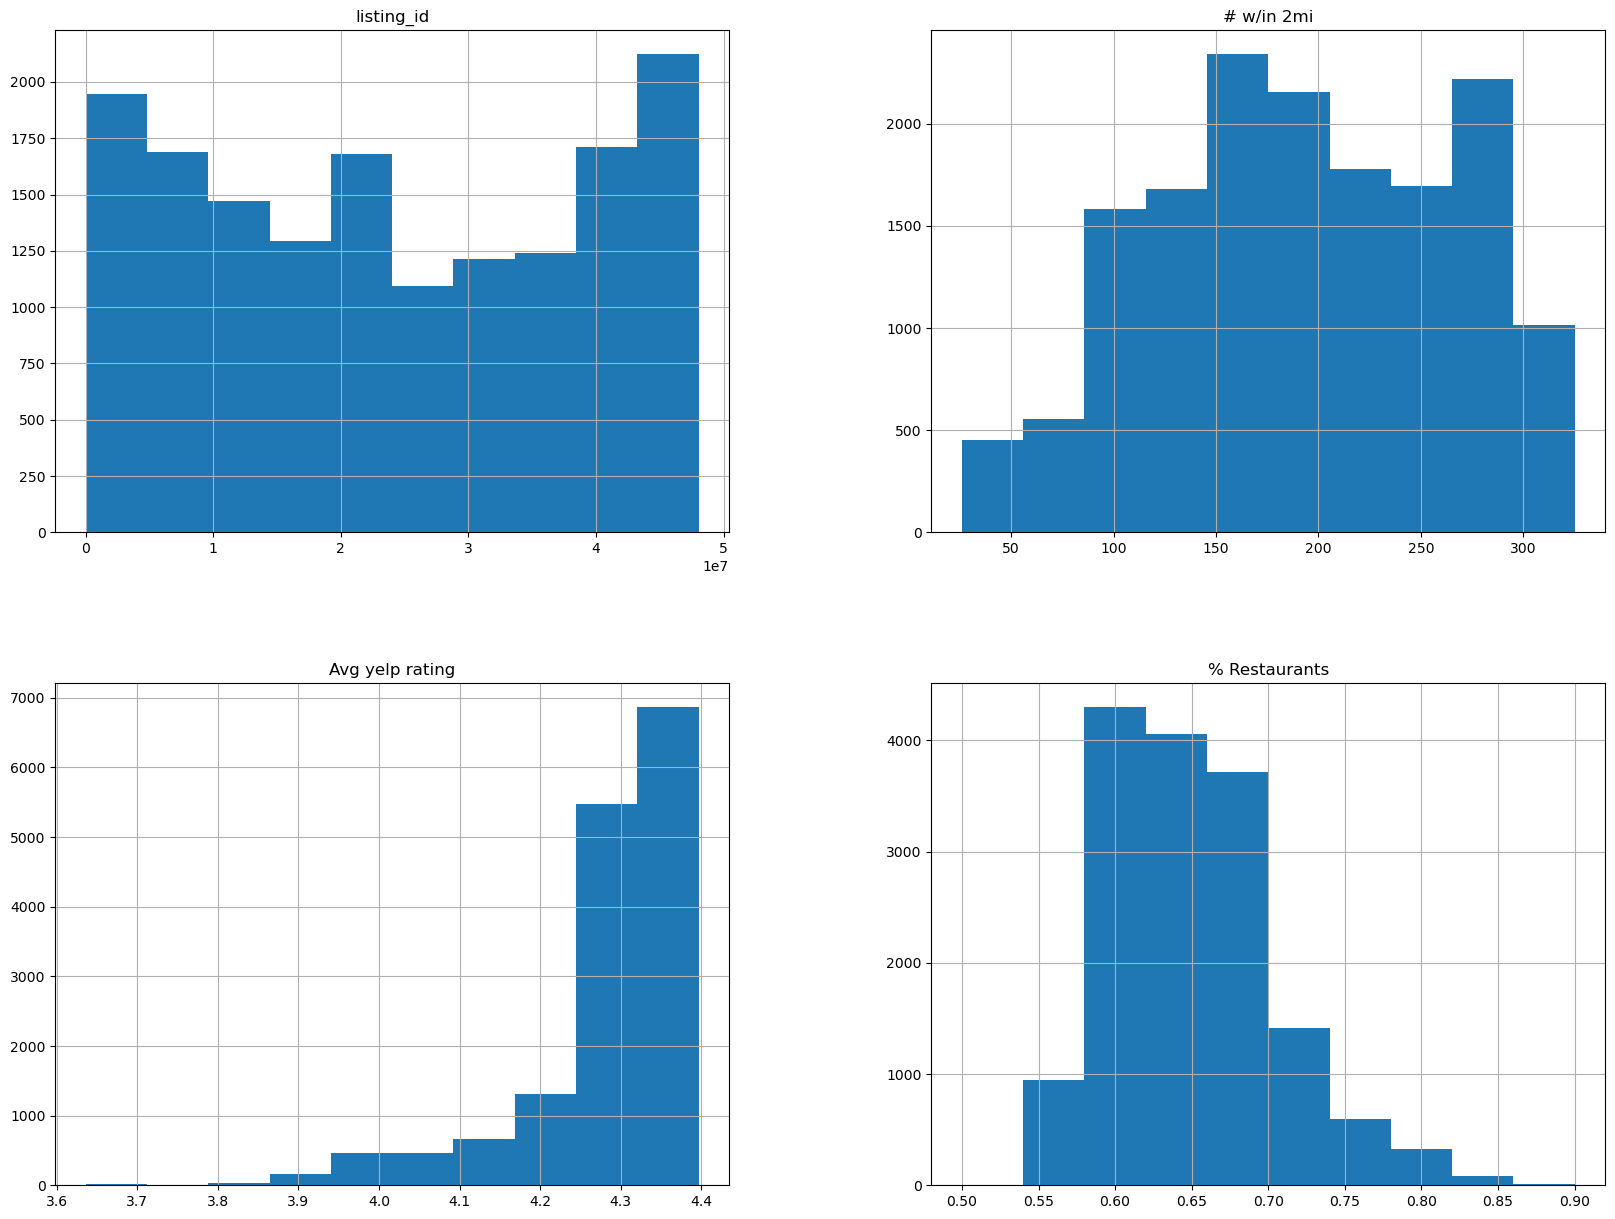

In [97]:
display_data.select_dtypes(include=np.number).hist(figsize=(20,15));

In [98]:
X_train.shape ,y_train.shape

((12370, 7), (12370,))

In [99]:
clf = GradientBoostingClassifier( n_estimators=100, learning_rate=.01, max_depth=4,random_state=0)

In [100]:
# Takes 75 mins to run 
# clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, random_state=0)

In [102]:
clf.score(X_test,y_test)

0.044293566117038476

In [103]:
y_pred = clf.predict(X_test)

In [104]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.044293566117038476


KNN Again splitting to NYC and Paris

In [69]:
ml_listings['city'].value_counts()

Paris       64628
New York    36984
Name: city, dtype: int64

In [81]:
paris_listing = ml_listings[ml_listings['city'] == 'Paris']
nyc_listing = ml_listings[ml_listings['city']== 'New York']

In [83]:
ml_listings['latitude'].isna().sum()

0

In [90]:
nyc_listing['price'].describe()

count    36984.000000
mean       142.950384
std        275.817326
min         10.000000
25%         60.000000
50%         99.000000
75%        151.000000
max      10000.000000
Name: price, dtype: float64

In [91]:
paris_listing['price'].describe()

count    64628.000000
mean       113.204942
std        214.507874
min          8.000000
25%         59.000000
50%         80.000000
75%        120.000000
max      12000.000000
Name: price, dtype: float64

In [101]:
nyc_listing['price'].describe()

count    36984.000000
mean       142.950384
std        275.817326
min         10.000000
25%         60.000000
50%         99.000000
75%        151.000000
max      10000.000000
Name: price, dtype: float64

NYC Listings with KNN and Price Threshold

In [94]:
X_ny = nyc_listing[['latitude','longitude']]
y_ny = nyc_listing['price']

In [99]:
price_thresh = 500
b_drop_yelp = True
test_size=0.2

sensible = y_ny < price_thresh
X_nyc_thresh = X_ny[sensible] 
y_nyc_thresh = y_ny[sensible]

print(len(y_ny), len(y_nyc_thresh))

if b_drop_yelp:
    X_nyc_tresh = X_nyc_thresh[['latitude','longitude']]
# X_will = Xwill[['# w/in 2mi']]

Xt, Xv, yt, yv = train_test_split(X_nyc_thresh, y_nyc_thresh, random_state=0, test_size=test_size)
print(Xt.shape,Xv.shape, yt.shape, yv.shape)
Xt.head(3)

for n_neighbors  in [2,5,10,20, 30, 50, 100,125,150,200]:
    kn = KNeighborsRegressor(n_neighbors=n_neighbors)
    kn.fit(Xt,yt)
    s = kn.score(Xt, yt),kn.score(Xv, yv)
    print(n_neighbors, s)

36984 36045
(28836, 2) (7209, 2) (28836,) (7209,)
2 (0.627785828470086, -0.12821335455178207)
5 (0.40189969464882336, 0.0858158069756062)
10 (0.3182355078596688, 0.1571219037107182)
20 (0.2663366750736482, 0.19594492026893928)
30 (0.24645503701241767, 0.20390118990960637)
50 (0.22658040168634375, 0.20323496152682485)
100 (0.20702867393642332, 0.19556921375846403)
125 (0.20181070035182314, 0.19197873793071074)
150 (0.19767399875387182, 0.19026015501636162)
200 (0.19174141969604053, 0.18507975785731)


Paris Listings with KNN and Price Threshold

In [102]:
X_paris = paris_listing[['latitude','longitude']]
y_paris = paris_listing['price']

In [107]:
price_thresh = 500
b_drop_yelp = True
test_size=0.2

sensible = y_paris < price_thresh
X_paris_thresh = X_paris[sensible] 
y_paris_thresh = y_paris[sensible]

print(len(y_paris), len(y_paris_thresh))

if b_drop_yelp:
    X_paris_thresh = X_paris_thresh[['latitude','longitude']]
# X_will = Xwill[['# w/in 2mi']]

X1t, X1v, y1t, y1v = train_test_split(X_paris_thresh, y_paris_thresh, random_state=0, test_size=test_size)
print(X1t.shape,X1v.shape, y1t.shape, y1v.shape)
Xt.head(3)

for n_neighbors  in [2,5,10,20, 30, 50, 100,125,150,200]:
    kn = KNeighborsRegressor(n_neighbors=n_neighbors)
    kn.fit(X1t,y1t)
    s = kn.score(X1t, y1t),kn.score(X1v, y1v)
    print(n_neighbors, s)

64628 63714
(50971, 2) (12743, 2) (50971,) (12743,)
2 (0.5799617555538658, -0.2673729917917187)
5 (0.33215441812195323, -0.024093073795442788)
10 (0.24144918422111372, 0.04756930912696744)
20 (0.19296278131479816, 0.08697584292569782)
30 (0.17475607808495253, 0.0998390065758119)
50 (0.15939198579781222, 0.11137588910716179)
100 (0.14505473258245738, 0.1176076649645379)
125 (0.14124123254675813, 0.11711627824837278)
150 (0.13864200305814278, 0.11687409085755718)
200 (0.1349648608222792, 0.11676879377380067)


AEverything together

In [106]:
X_all = ml_listings[['latitude','longitude']]
y_all = ml_listings['price']

In [108]:
price_thresh = 500
b_drop_yelp = True
test_size=0.2

sensible = y_all < price_thresh
X_all_thresh = X_all[sensible] 
y_all_thresh = y_all[sensible]

print(len(y_all), len(y_all_thresh))

if b_drop_yelp:
    X_all_thresh = X_all_thresh[['latitude','longitude']]
# X_will = Xwill[['# w/in 2mi']]

X2t, X2v, y2t, y2v = train_test_split(X_all_thresh, y_all_thresh, random_state=0, test_size=test_size)
print(X2t.shape,X2v.shape, y2t.shape, y2v.shape)
Xt.head(3)

for n_neighbors  in [2,5,10,20, 30, 50, 100,125,150,200]:
    kn = KNeighborsRegressor(n_neighbors=n_neighbors)
    kn.fit(X2t,y2t)
    s = kn.score(X2t, y2t),kn.score(X2v, y2v)
    print(n_neighbors, s)

101612 99759
(79807, 2) (19952, 2) (79807,) (19952,)
2 (0.6048789173627314, -0.16285732999997382)
5 (0.3693330310042001, 0.05679767982845629)
10 (0.2802980948110396, 0.13295452088485715)
20 (0.23124193983424746, 0.16405644495191818)
30 (0.21420475104483483, 0.17180964012434385)
50 (0.19791477933491441, 0.17619944429697432)
100 (0.18131864453429958, 0.1767540137917849)
125 (0.17670045257653622, 0.17760036000840929)
150 (0.1730544280790215, 0.17722114332715944)
200 (0.16790678659082459, 0.17571009997613374)


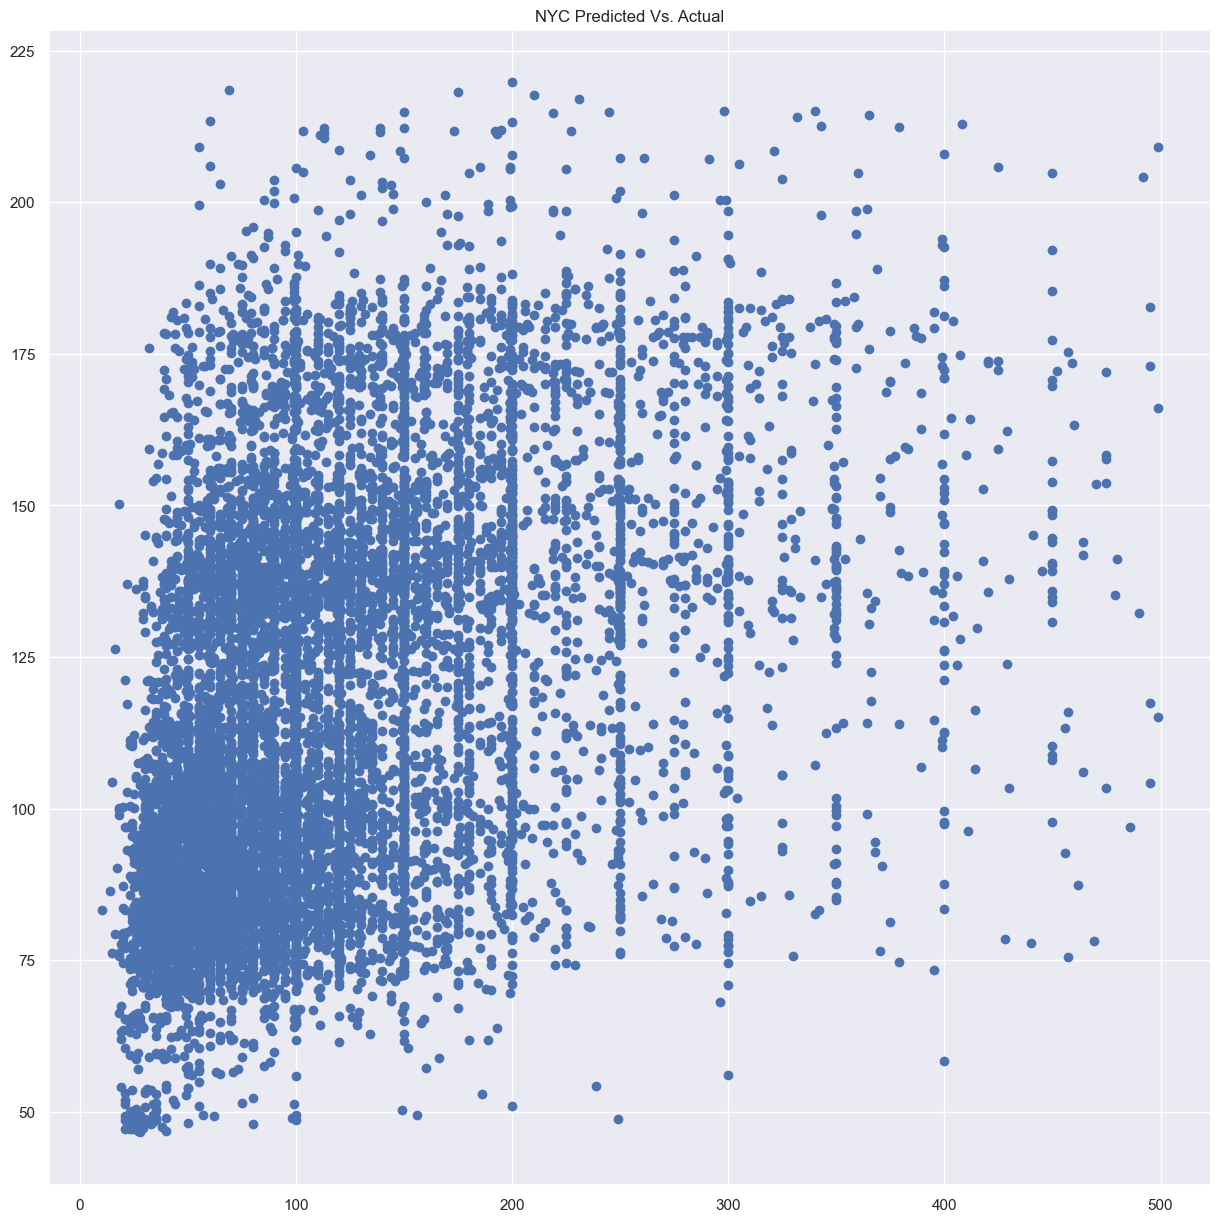

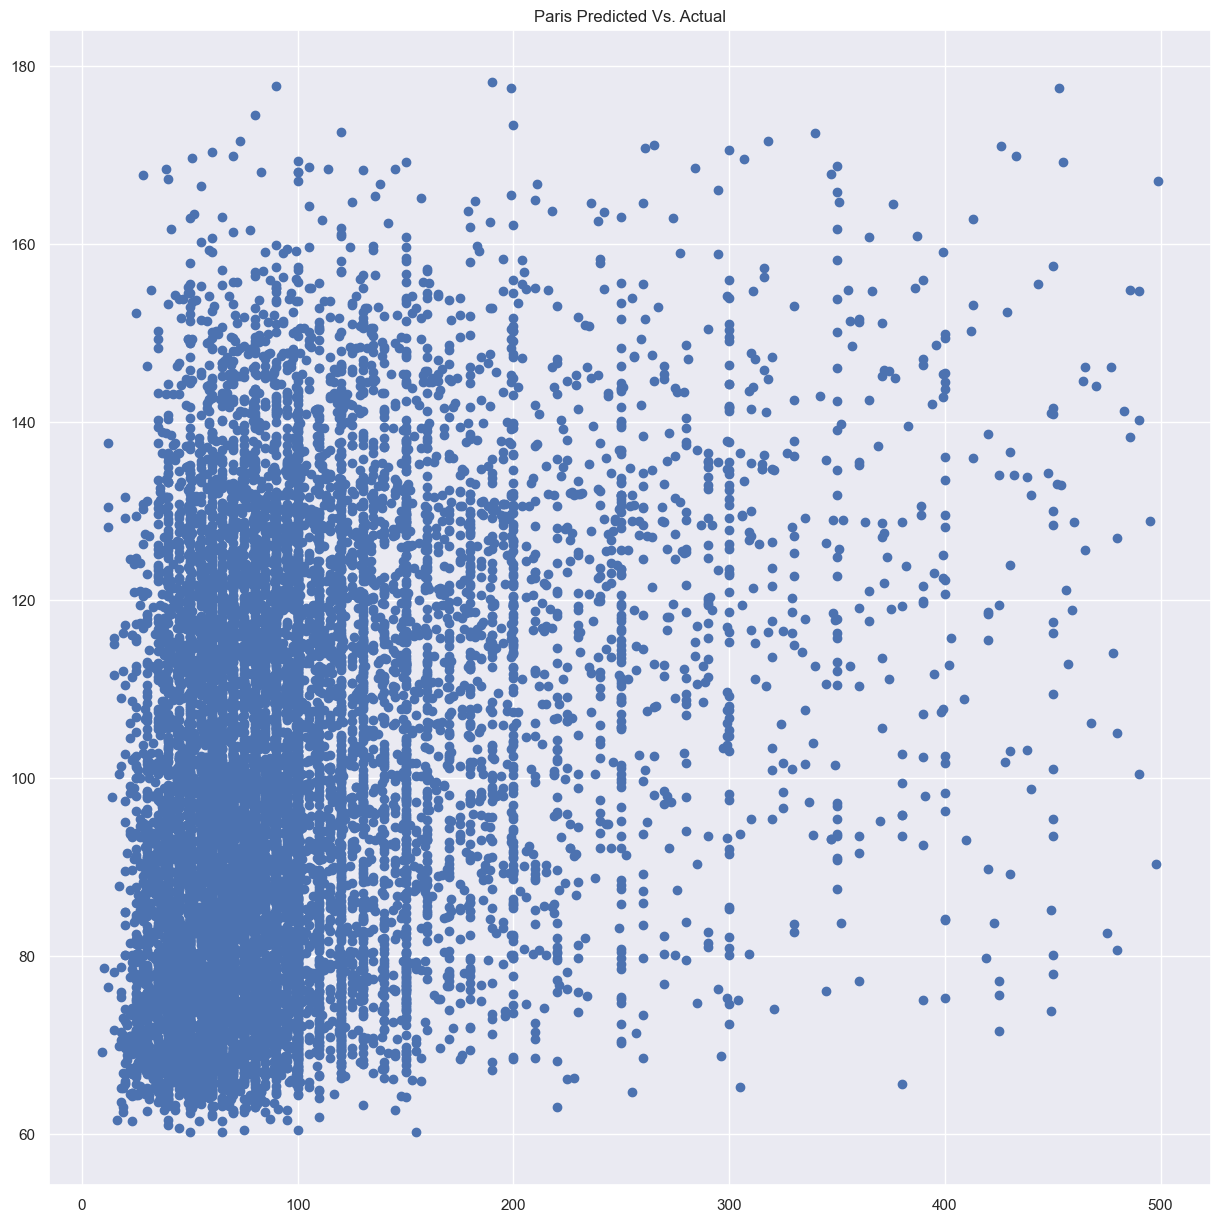

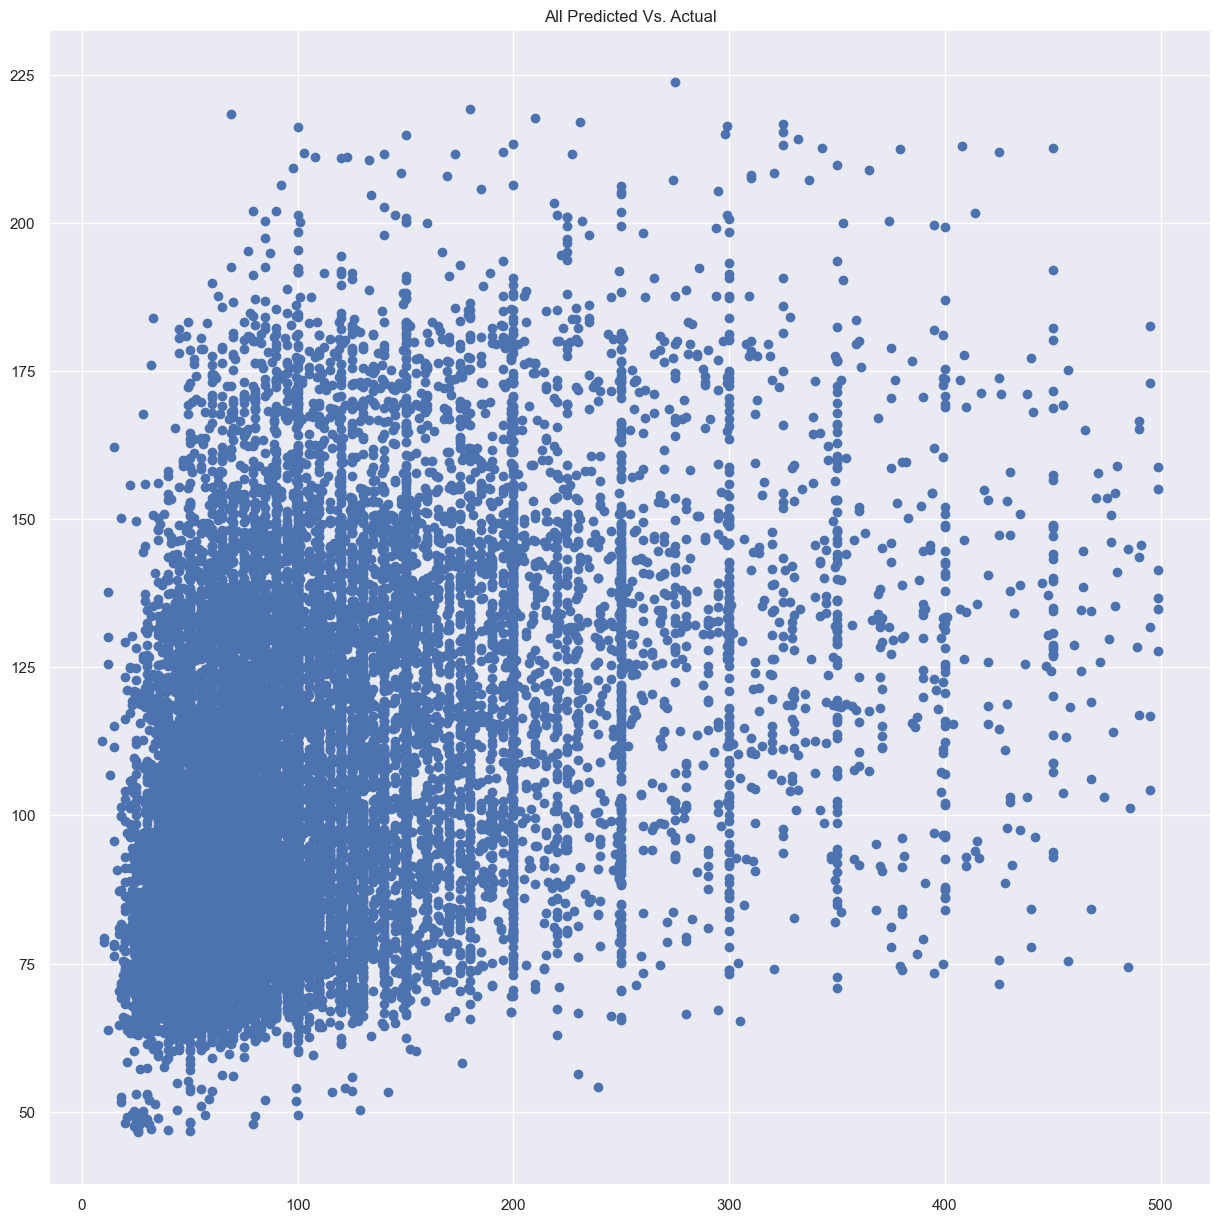

In [113]:
plt.scatter(x=yv,y=kn.predict(Xv))
plt.title('NYC Predicted Vs. Actual')
plt.show()

plt.scatter(x=y1v,y=kn.predict(X1v))
plt.title('Paris Predicted Vs. Actual')
plt.show()

plt.scatter(x=y2v,y=kn.predict(X2v))
plt.title('All Predicted Vs. Actual')
plt.show()

In [117]:
ml_listings.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       '# w/in 2mi', 'Avg yelp rating', '% Restaurants'],
      dtype='object')

In [136]:
# X_all2_dummies = pd.get_dummies(X_all2, columns=['property_type'], drop_first=True)

In [147]:
X_all2 =ml_listings[[
    'latitude',
    'longitude',
    # 'property_type',
    'accommodates'
]]

price_thresh = 500
b_drop_yelp = True
test_size=0.2

sensible = y_all < price_thresh
X_all2_thresh = X_all2[sensible] 
y_all_thresh = y_all[sensible]

# print(len(y_all), len(y_all_thresh))

# if b_drop_yelp:
#     X_all_thresh = X_all_thresh[['latitude','longitude']]
# # X_will = Xwill[['# w/in 2mi']]

Xtaccom, Xvaccom, ytaccom, yvaccom = train_test_split(X_all2_thresh, y_all_thresh, random_state=0, test_size=test_size)
print(Xtaccom.shape,Xvaccom.shape, ytaccom.shape, yvaccom.shape)
Xtaccom.head(3)

for n_neighbors  in [2,5,10,20, 30, 50, 100,125,150,200]:
    kn = KNeighborsRegressor(n_neighbors=n_neighbors)
    kn.fit(Xtaccom,ytaccom)
    s = kn.score(Xtaccom, ytaccom),kn.score(Xvaccom, yvaccom)
    print(n_neighbors, s)

(79807, 3) (19952, 3) (79807,) (19952,)
2 (0.7417333097853893, 0.2229172472074975)
5 (0.574609290863795, 0.36531975507774483)
10 (0.5099723839627631, 0.40116003766554675)
20 (0.4716113310106692, 0.41808997461782027)
30 (0.45550917505828414, 0.4233185236772593)
50 (0.44074969444968914, 0.4209391301947214)
100 (0.42424814783313347, 0.4168745834994939)
125 (0.4193117101171542, 0.41393692879570265)
150 (0.4149444394635141, 0.41145932087238934)
200 (0.4090564563363268, 0.40718808234119297)


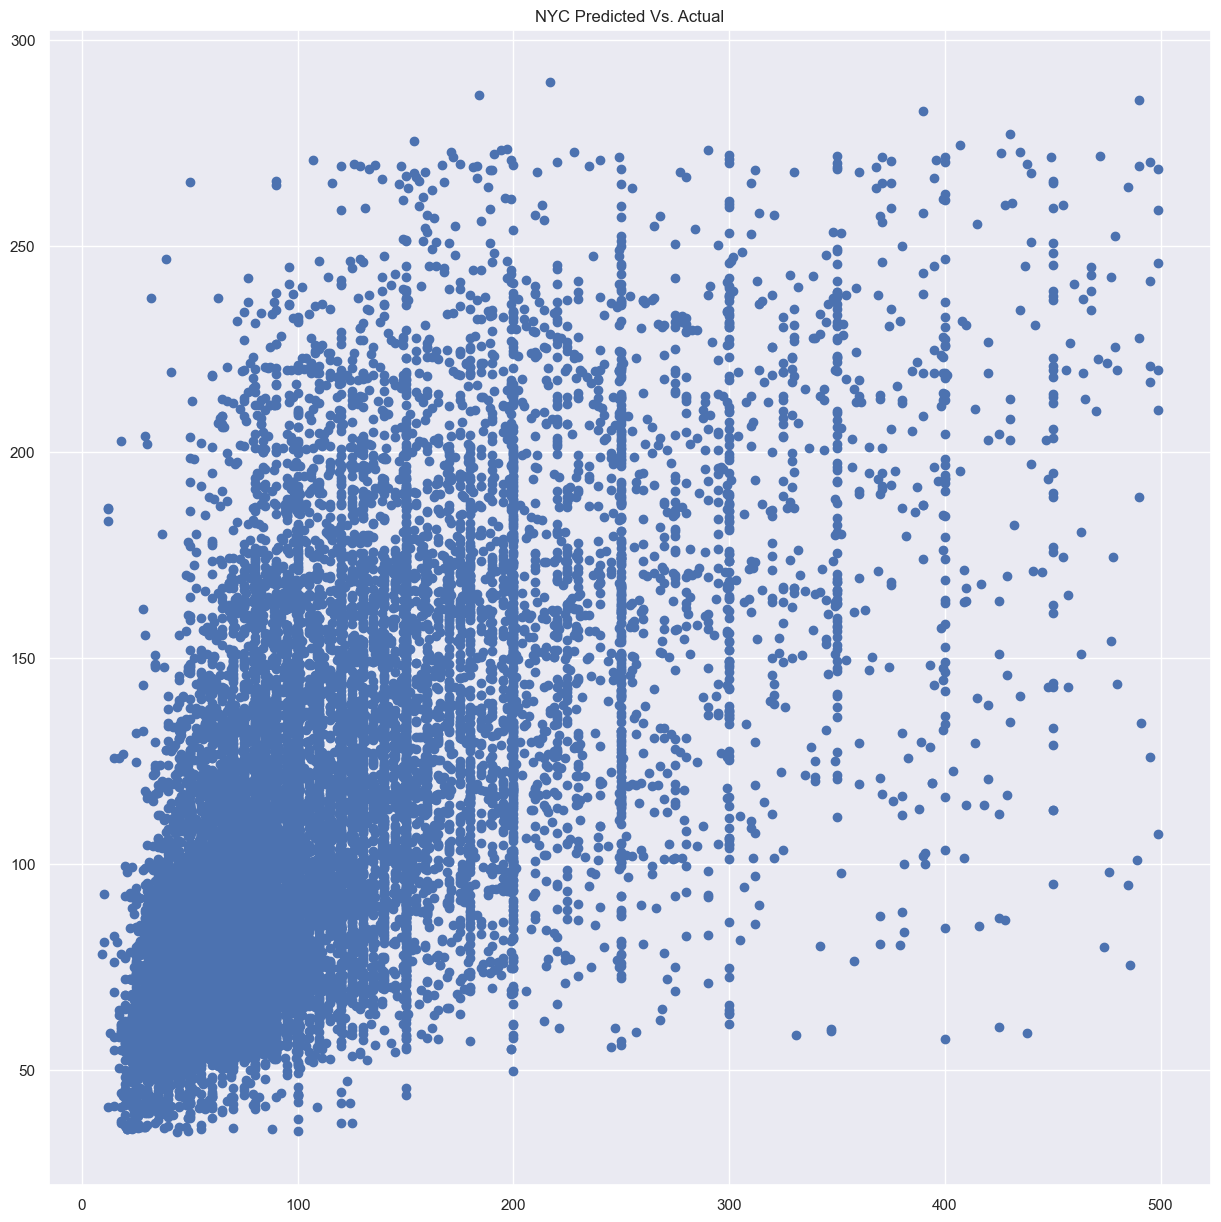

In [148]:
plt.scatter(x=yvaccom,y=kn.predict(Xvaccom))
plt.title('NYC Predicted Vs. Actual')
plt.show()

In [145]:
X_all3 =ml_listings[[
    'latitude',
    'longitude',
    # 'property_type',
    'accommodates',
    # 'bedrooms', Doesn't seem to help
    # Everything below together does not help. Mkaes prediction worse

    # 'review_scores_rating',# Doesn't seem to help
    # 'review_scores_accuracy', 
    # 'review_scores_cleanliness',
    # 'review_scores_checkin',
    # 'review_scores_communication',
    # 'review_scores_location',
    # 'review_scores_value',
    '# w/in 2mi',
    'Avg yelp rating',
    '% Restaurants'
    
    
]]

price_thresh = 500
b_drop_yelp = True
test_size=0.2

sensible = y_all < price_thresh
X_all3_thresh = X_all[sensible] 
y_all_thresh = y_all[sensible]

# print(len(y_all), len(y_all_thresh))

# if b_drop_yelp:
#     X_all_thresh = X_all_thresh[['latitude','longitude']]
# # X_will = Xwill[['# w/in 2mi']]

Xtaccom1, Xvaccom1, ytaccom1, yvaccom1 = train_test_split(X_all3_thresh, y_all_thresh, random_state=0, test_size=test_size)
print(Xtaccom1.shape,Xvaccom1.shape, ytaccom1.shape, yvaccom1.shape)
Xtaccom1.head(3)

for n_neighbors  in [2,5,10,20, 30, 50, 100,125,150,200]:
    kn = KNeighborsRegressor(n_neighbors=n_neighbors)
    kn.fit(Xtaccom1,ytaccom1)
    s = kn.score(Xtaccom1, ytaccom1),kn.score(Xvaccom1, yvaccom1)
    print(n_neighbors, s)

(79807, 2) (19952, 2) (79807,) (19952,)
2 (0.6048789173627314, -0.16285732999997382)
5 (0.3693330310042001, 0.05679767982845629)
10 (0.2802980948110396, 0.13295452088485715)
20 (0.23124193983424746, 0.16405644495191818)
30 (0.21420475104483483, 0.17180964012434385)
50 (0.19791477933491441, 0.17619944429697432)
100 (0.18131864453429958, 0.1767540137917849)
125 (0.17670045257653622, 0.17760036000840929)
150 (0.1730544280790215, 0.17722114332715944)
200 (0.16790678659082459, 0.17571009997613374)
